<a href="https://colab.research.google.com/github/AlexBB999/Classwork/blob/master/25_6_Assignment_GMM_3_11_20_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apply GMM to the heart disease data by setting n_components=2.

Get ARI and silhoutte scores for your solution and compare it with those of the k-means and hierarchical clustering solutions that you implemented in the assignments of the previous checkpoints.

Which algorithm does perform better?

GMM implementation of scikit-learn has a parameter called **covariance_type**.

This parameter determines the type of covariance parameters to use. Specifically, there are four types you can specify:

**full**: This is the default. **Each** component has its own general covariance matrix.

**tied**: **All** components share the same general covariance matrix.

**diag**: **Each** component has its own diagonal covariance matrix.

**spherical**: **Each** component has its own single variance.

Try all of these. Which one does perform better in terms of ARI and silhouette scores?


##**Assumptions of GMM**

There are two important assumptions that GMM makes:

**The first one is that there are k distributions that generate the data**. 
**In effect, this is equivalent to say that there are exactly k clusters in the data**.

**The other assumption is that all of these k distributions are Gaussians**. However, GMM doesn't put constraints on the parameters of these Gaussians but estimates them such that the likelihood of the data being generated by these k Gaussians is maximized.

If one of the assumptions fails to hold in our data, then GMM may produce nonuseful clusters.

Even though it has these two assumptions, GMM is still a quite flexible method for clustering. Just notice that, **GMM releases two of the assumptions of k-means** that we saw in the checkpoint where we discussed the k-means algorithm.

**Specifically, GMM doesn't assume that the clusters are isotropic and have the similar variances**.
 
**From this perspective, one can even think of k-means as a special case of GMM**.

In [0]:
import numpy as np
import pandas as pd
import scipy
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

from collections import Counter

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture


In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
hd0 = pd.read_sql_query('select * FROM heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [0]:
heart=hd0.copy()

In [0]:
# Define the features and the outcome
X = heart.iloc[:, :13]
y = heart.iloc[:, 13]


# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [0]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [0]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

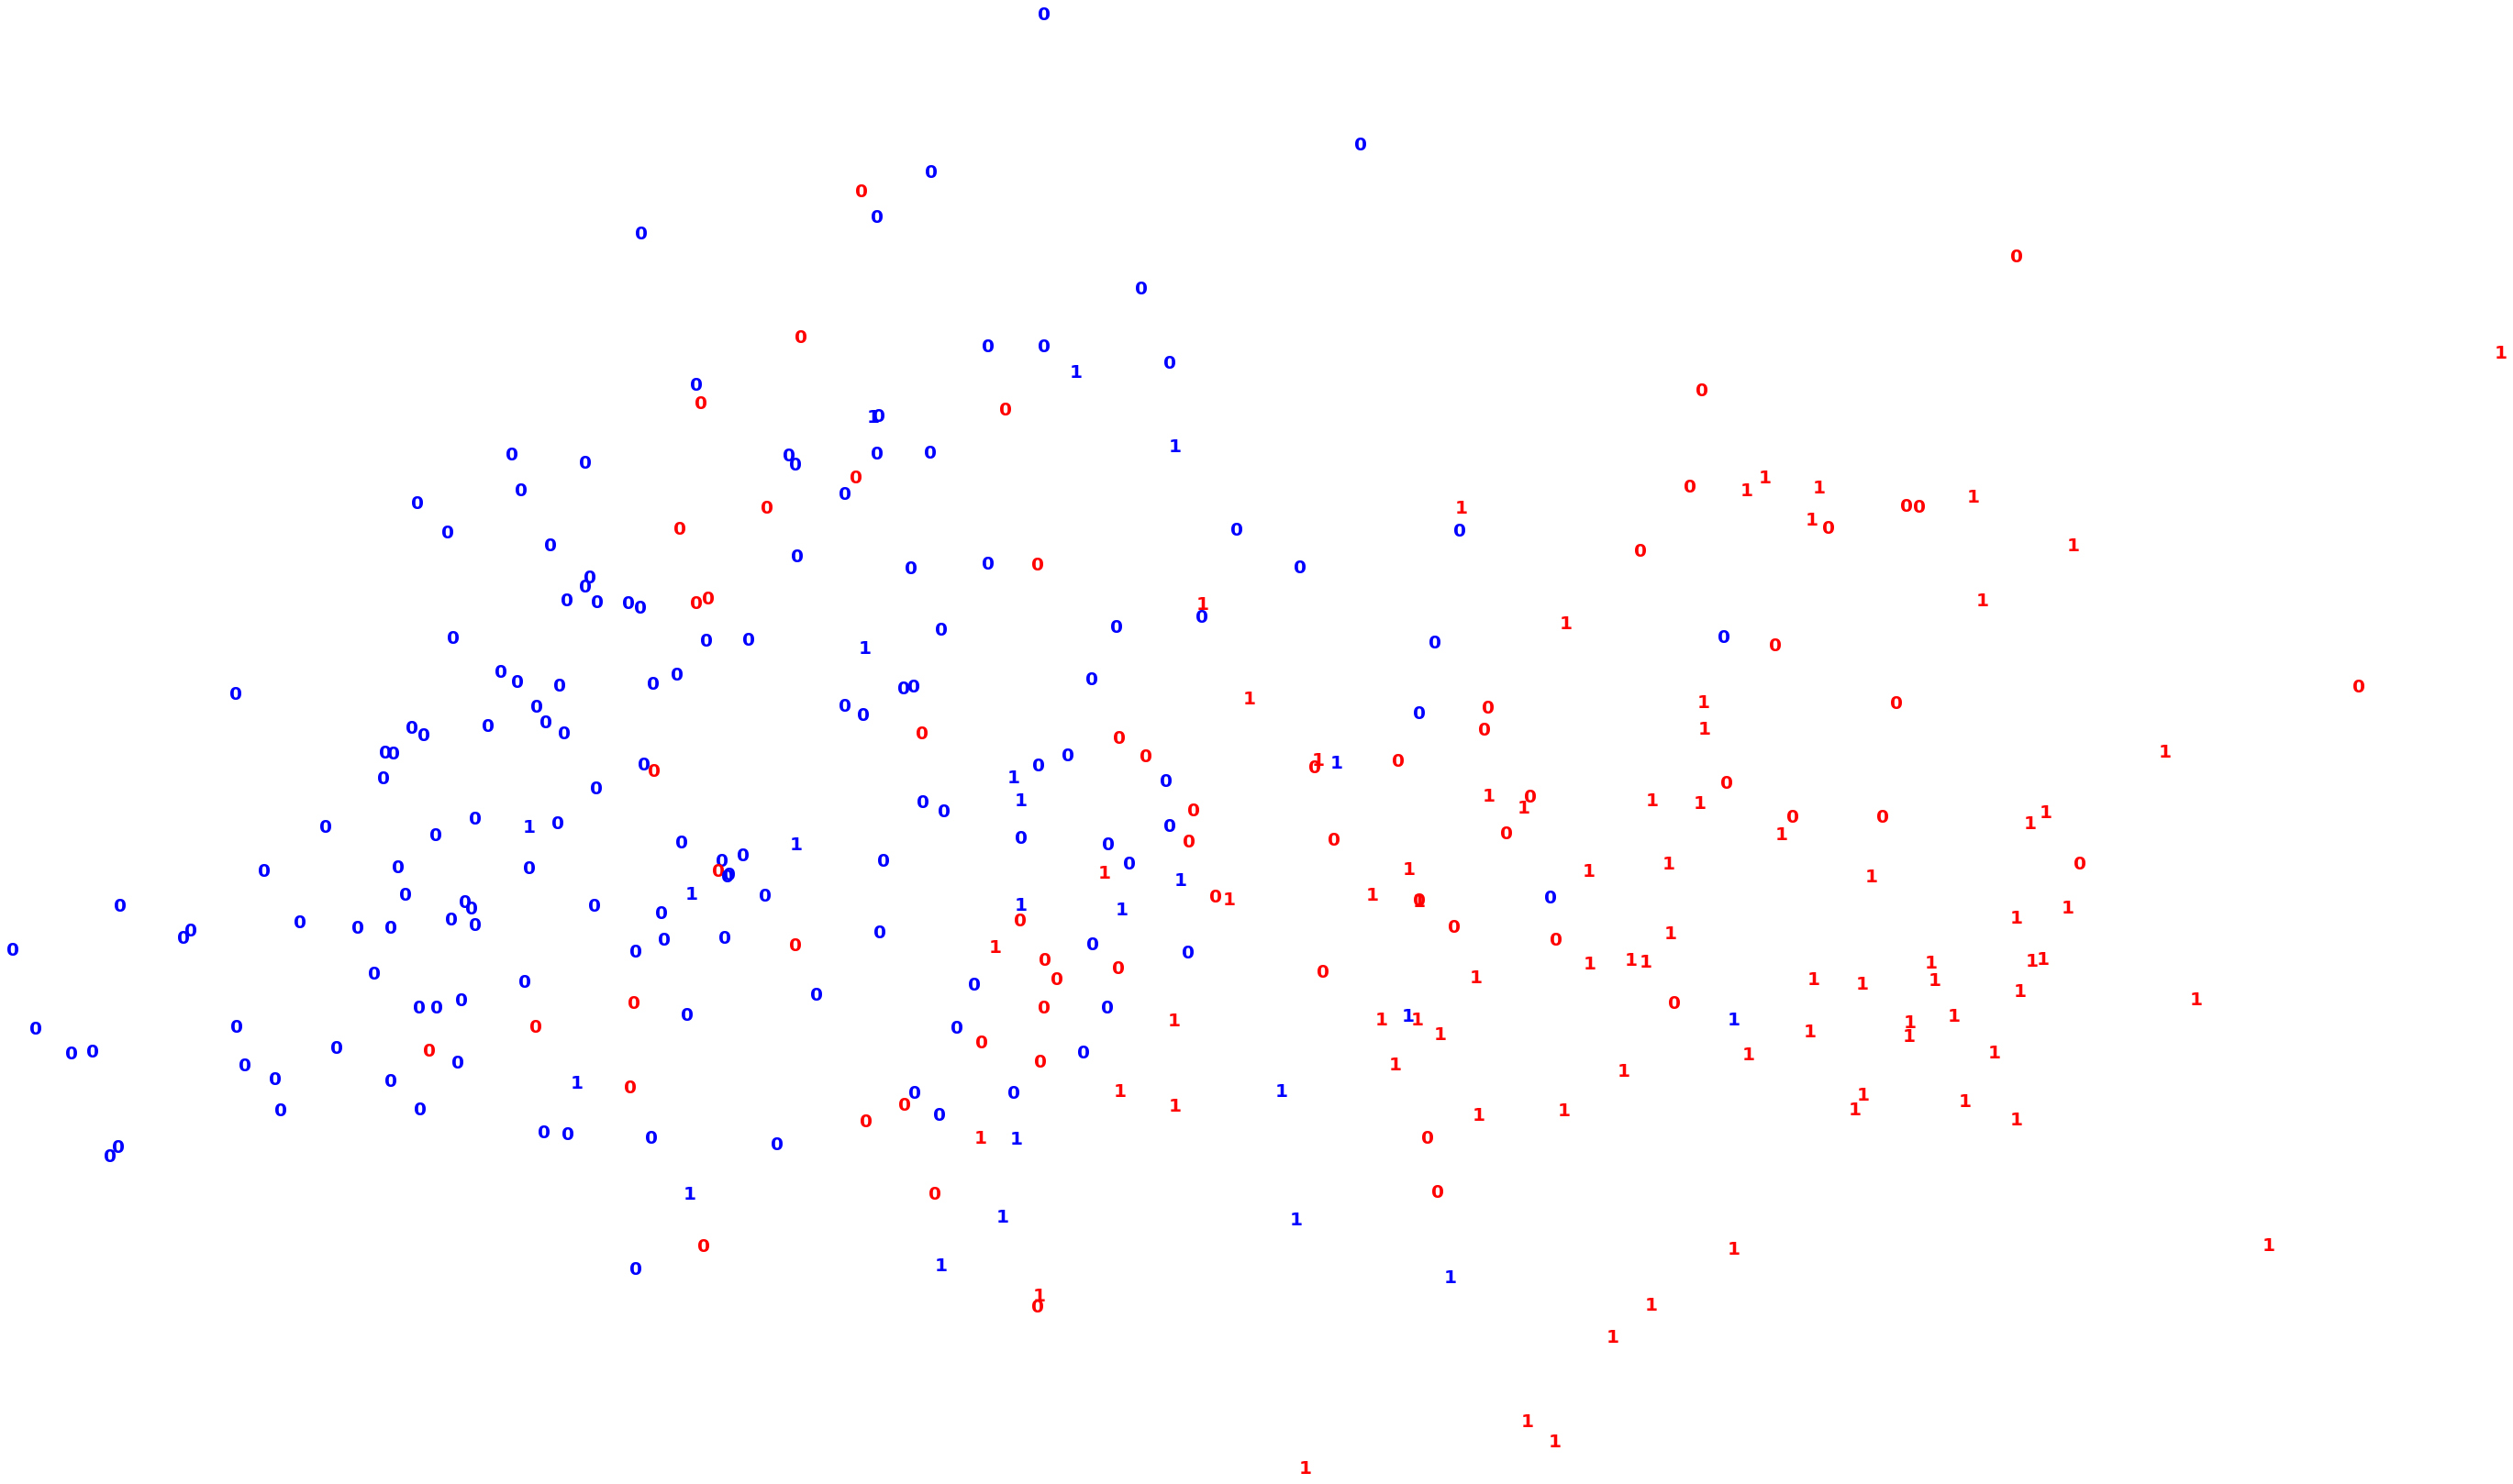

In [21]:

plt.rcParams["figure.figsize"] = [6,4]
pca = PCA(n_components=2).fit_transform(X_std)

#plt.figure(figsize=(6,3))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 20}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [22]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.18389186035089963
The silhoutte score of the GMM solution: 0.13628813153331445


**HARD TO COMPARE TO PREVIOUS RESULTS -- DIFFERENT PARAMETERS**

//////////////////////////////////////////////////////////////////////////////////////////////

##**COVARIANCE TYPE**

**FULL**

In [0]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123,covariance_type='full')

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

In [41]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.18389186035089963
The silhoutte score of the GMM solution: 0.13628813153331445


**TIED**

In [0]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123,covariance_type='tied')

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

In [37]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.18389186035089963
The silhoutte score of the GMM solution: 0.13628813153331445


**DIAG**

In [0]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123,covariance_type='diag')

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

In [39]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.18389186035089963
The silhoutte score of the GMM solution: 0.13628813153331445


**SPHERICAL**

In [0]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123,covariance_type='spherical')

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

In [35]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.20765243525722465
The silhoutte score of the GMM solution: 0.12468753110276873


**ALL IDENTICAL SCORES EXCEPT  SPHERICAL**

**SPHERICAL HAS BEST ARI**

**OTHERS BEST SILHOUETTE**